<a href="https://colab.research.google.com/github/laperez/Phyton/blob/master/Introducci%C3%B3n_a_SciPy_alumno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1\. Introducción a SciPy ![](https://scipy.org/_static/images/scipy_med.png)
*Inicio rápido a Python para investigación. Cursos del Programa de Doctorado en TIC.*

Arturo Montejo Ráez - amontejo@ujaen.es

Departamento de Informática 

Universidad de Jaén

---

Vamos a contextualizar primer,o tecnológicamente y luego científicamente. **SciPy**. Más que una biblioteca, es un marco de trabajo para la programación científica en Python similar a entornos como Scilab, Octave o Matlab. Los componentes principales son los siguientes:

![SciPy stack](https://drive.google.com/uc?id=15HT89IkCBQew4zOjJKNN2u4zK4sysdx4)

* **Python**: El lenguaje base interpretado que se usa para programar. Hay [libros](https://www.casadellibro.com/libro-curso-de-programacion-python-manuales-imprescindibles/9788441541160/9598369) muy buenos para aprenderlo. 😁 
* **IPython**: Un acceso al intérprete mediante una interfaz interactiva donde poder jugar con el código mediante celdas aisladas sobre un único *kernel*. Sobre SciPy se construyen otras herramientas de programación interactia como Jupyter.
* **NumPy**: La biblioteca para trabajo con arrays multidimensionales (tensores y matrices). 
* **Pandas**: Biblioteca para lectura, escritura y manipulación de tablas de datos.
* **SciPy**: Biblioteca que ofrece diversas herramientas para cálculo numérico (integración, interpolación, optimización, álgebra lineal, estadística...).
* **SymPy**: Biblioteca que ofrece diversas herramientas para el cálculo simbólico (matrices, simplificación, cálculo de derivadas, integrales, límites, series...). Vamos a verla con más detalle en este cuaderno.
* **Matplotlib**: Biblioteca para la **visualización de datos**. Esta biblioteca va a ser nuestro foco de atención para el resto del curso.

Podemos visitar la web oficial de SciPy para acceder a toda la documentación:

[![](https://docs.scipy.org/doc/scipy/reference/_static/img/scipy_org_logo.png)](https://scipy.org)


# 2\. Módulos de SciPy

Estos son los [módulos principales de SciPy](https://docs.scipy.org/doc/scipy/reference/):

| Submódulo | Descripción |
| ---------- | ----------- |
| cluster | Algoritmos de agrupamiento (mejor usar Scikit-learn) |
| constants | Constantes físicas y matemáticas |
| fftpack | Rutinas para la Transformada Rápida de Fourier |
| integrate | Resolución numérica de integrales y ecuaciones diferenciales |
| interpolate | Interpolación y curvas suaves |
| io | Herramientas de entrada/salida |
| linalg | Álgebra lineal (cálculos con vectores y matrices) |
| ndimage | Procesamiento n-dimensional de imágenes |
| odr | Regresión por distancia ortogonal |
| optimize | Rutinas de optimización y búsqueda de raíces |
| signal | Procesamiento de la señal |
| sparse | Matrices dispersas y rutinas asociadas |
| spatial | Algoritmos y estructuras de datos espaciales |
| special | Funciones especiales |
| stats | Distribuciones y funciones estadísticas |

Veremos unos ejemplos de uso para algunos de ellos.

# 3\. Funciones básicas

Además de los módulos anteriores, SciPy incorpora algunas funcionalidades básicas que merece la pena conocer:

## 3.1. Generación de arrays

Aunque tenemos toda la potencia de NumPy para generar tensores, SciPy le incorpora una sintaxis rápida de creación de datos.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

En lugar de usar:

In [ ]:
np.concatenate(([3], [0]*5, np.arange(-1, 1.002, 2/9.0)))

Podemos usar `r_[]` (*row concatenation*):

In [ ]:
np.r_[3,[0]*5,-1:1:10j]

Con `mgrid` es sencillo crear arrays multidimensionales a partir de rangos específicos:

In [ ]:
np.mgrid[0:5,0:5]

In [ ]:
np.mgrid[0:5:4j,0:5:4j]

Como puede verse, la notación `j` se usa para indicar el número de valores a generar en el intervalo cerrado dado.

## 3.2. Polinomios

Aunque disponemos de [SymPy](https://www.sympy.org/en/index.html) para cálculo simbólico, SciPy incorpora la posibilidad de trabajar con polinomios y hacer operaciones de integración, derivación, simplificación, etc. con ellos.

In [1]:
from scipy import poly1d

p = poly1d([8,2,5,6])
print(p)

   3     2
8 x + 2 x + 5 x + 6


In [2]:
print(p*p)

    6      5      4       3      2
64 x + 32 x + 84 x + 116 x + 49 x + 60 x + 36


In [3]:
# Derivada de p
print(p.deriv())

    2
24 x + 4 x + 5


In [4]:
# Derivada segunda de p
print(p.deriv(m=2))

 
48 x + 4


In [5]:
# Integral de p en 5
print(p.integ(k=5))

   4          3       2
2 x + 0.6667 x + 2.5 x + 6 x + 5


In [6]:
# Raíces de p
p.r

array([ 0.25+0.96824584j,  0.25-0.96824584j, -0.75+0.j        ])

In [7]:
# Evaluación del polinomio
p(3)

255

In [8]:
p(p.r[0])

(-4.440892098500626e-15+2.220446049250313e-15j)

Para conocer todas las posibles funciones matemáticas (factorial, combinatoria...) debemos ir al módulo [scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special)

# 4\. Optimización

El módulo [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) proporciona varios métodos de optimización (ajuste, búsqueda de raíces, búsqueda de mínimos y máximos...). Veamos un ejemplo para un ajuste por mínimos cuadrados de una función dada (basada en el modelo que queremos usar para el ajuste):

In [10]:
import numpy as np
from scipy.optimize import least_squares

#
# Este ejemplo trata de calcular los parámetros de una reacción enzimática
# definida en el modelo indicado.
#

def model(x, u): # x son los parámetros a ajustar, u representa las variables independientes
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y): # esta función calcula la diferencia entre los valores esperados y los valores calculados con los parámetros x
    return model(x, u) - y

# Variables independientes
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1, 8.33e-2, 7.14e-2, 6.25e-2])

# Valores medidos 
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2, 4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])

# Valores de inicialización
x0 = np.array([2.5, 3.9, 4.15, 3.9]) 

res = least_squares(fun, x0, bounds=(0, 100), args=(u, y), verbose=1)

# "residuos" (valores finales de ajuste)
res.x

`ftol` termination condition is satisfied.
Function evaluations 131, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.43e-08.


array([0.192806  , 0.19130333, 0.12306046, 0.13607206])

In [ ]:
import matplotlib.pyplot as plt

u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='datos')
plt.plot(u_test, y_test, label='modelo ajustado')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

# 5\. Interpolación

Las funciones de interpolación permiten generar datos a partir de valores conocidos mediante una estimación que dependerá del método elegido para interpolar: lineal, cúbico, con curvas paramétricas (*splines*).

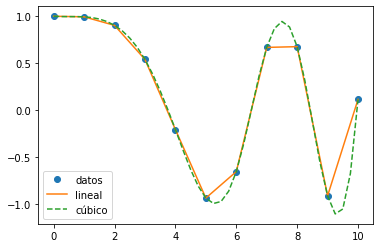

In [11]:
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['datos', 'lineal', 'cúbico'], loc='best')

plt.show()

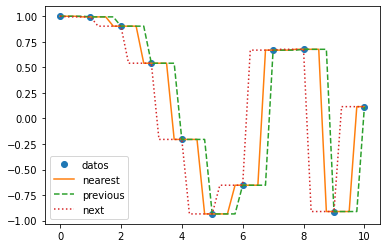

In [12]:
f1 = interp1d(x, y, kind='nearest')  # se opta por el valor más cercano
f2 = interp1d(x, y, kind='previous') # valor anterior
f3 = interp1d(x, y, kind='next')     # valor siguiente

new = np.linspace(0, 10, num=1001, endpoint=True)

plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['datos', 'nearest', 'previous', 'next'], loc='best')
plt.show()

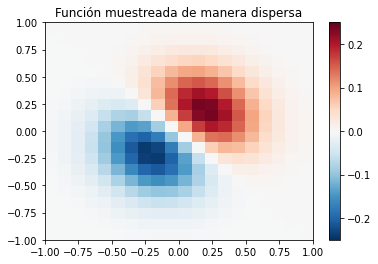

In [13]:
# definimos una malla de valores dispersos de 20x20
x_edges, y_edges = np.mgrid[-1:1:21j, -1:1:21j]
x = x_edges[:-1, :-1] + np.diff(x_edges[:2, 0])[0] / 2.
y = y_edges[:-1, :-1] + np.diff(y_edges[0, :2])[0] / 2.
z = (x+y) * np.exp(-6.0*(x*x+y*y))

plt.figure()
lims = dict(cmap='RdBu_r', vmin=-0.25, vmax=0.25)
plt.pcolormesh(x_edges, y_edges, z, shading='flat', **lims)
plt.colorbar()
plt.title("Función muestreada de manera dispersa")
plt.show()

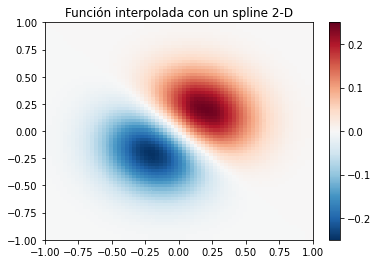

In [14]:
# Interpolamos con un nuevo grid de 70x70
from scipy.interpolate import bisplrep, bisplev

xnew_edges, ynew_edges = np.mgrid[-1:1:71j, -1:1:71j]
xnew = xnew_edges[:-1, :-1] + np.diff(xnew_edges[:2, 0])[0] / 2.
ynew = ynew_edges[:-1, :-1] + np.diff(ynew_edges[0, :2])[0] / 2.
tck = bisplrep(x, y, z, s=0)                 # interpolamos
znew = bisplev(xnew[:,0], ynew[0,:], tck)    # evaluamos la interpolación

plt.figure()
plt.pcolormesh(xnew_edges, ynew_edges, znew, shading='flat', **lims)
plt.colorbar()
plt.title("Función interpolada con un spline 2-D")
plt.show()

Todos estos ejemplos están sacados del tutorial oficial de SciPy.

# 6\. Álgebra lineal

Un nutrido conjunto de operaciones con matrices y vectores (transformadas, descomposiciones, inversas, resolución de sistemas lineales, cálculo de determinantes, etc.) están integradas en el módulo [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html).

Veamos un ejemplo para realizar una descomposición en valores singulares (SVD). La descomposición SVD descompone cualquier matriz M en tres matrices: dos externas de rotación y una de escalado (esta última es la que contiene los valores singulares).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/1200px-Singular-Value-Decomposition.svg.png" width="400">

In [15]:
import numpy as np
from scipy import linalg

# Definimos una matrix M
M = np.mat('[1 3 2; 1 2 3]')

# Descomponemos
m,n = M.shape
U,s,Vh = linalg.svd(M)
Sig = np.mat(linalg.diagsvd(s,m,n))
U, Vh = np.mat(U), np.mat(Vh)

# Primera rotación
U

matrix([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]])

In [16]:
# Valores singulares
Sig

matrix([[5.19615242, 0.        , 0.        ],
        [0.        , 1.        , 0.        ]])

In [17]:
# Segunda rotación
Vh

matrix([[-2.72165527e-01, -6.80413817e-01, -6.80413817e-01],
        [ 7.54115369e-16, -7.07106781e-01,  7.07106781e-01],
        [-9.62250449e-01,  1.92450090e-01,  1.92450090e-01]])

In [18]:
# Comprobamos recomposición
U.dot(Sig.dot(Vh))

matrix([[1., 3., 2.],
        [1., 2., 3.]])

In [19]:
# Reducimos a un único valores singular
Sigr = np.mat([[Sig[0,0], 0, 0], [0,0,0]])
Sigr

matrix([[5.19615242, 0.        , 0.        ],
        [0.        , 0.        , 0.        ]])

In [ ]:
# Matriz aproximada
Mr = U.dot(Sigr.dot(Vh))
Mr

In [ ]:
# Comprobamos fidelidad sobre una nueva matriz aleatoria
A = np.mat(np.random.rand(4,2))
A

In [ ]:
A.dot(M)

In [ ]:
A.dot(Mr)

# 7\. Funciones espaciales

El módulo [scipy.spatial](https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html) proporciona herramientas interesantes, como el cálculo de la envolvente (*convex-hull*), particionado de datos en diagramas de Voronoi, triangulación, etc.

Vamos a ver un ejemplo de cálculo de la envolven para una nube de puntos dada:

In [20]:
import numpy as np
from scipy.spatial import ConvexHull
points = np.random.rand(30, 2)   # 30 puntos con sus coordenadas x e y (2D)
hull = ConvexHull(points)
hull

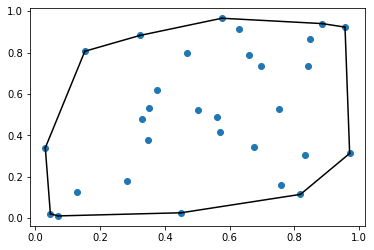

In [21]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

# 8\. Análisis de la señal

El módulo [scipy.signal](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html) proporciona herramientas para el filtrado de la señal (1D y 2D) y el análisis espectral.

Veamos un ejemplo de análisis espectral usando el método de Welch.


In [ ]:
import scipy.signal as signal

fs = 10e3
N = 1e3
amp = 2*np.sqrt(2)
freq = 1270.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.semilogy(x)
plt.grid()
plt.show()

In [ ]:
f, Pwelch_spec = signal.welch(x, fs, scaling='spectrum')

plt.semilogy(f, Pwelch_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()


# Ejercicios

1. Calcula la suma de las áreas que quedan delimitadas por el eje de abcisas y la función ![](https://drive.google.com/uc?id=1uTmCxIbPX9mqZJCM95gws-hzyNxXuPGF).

![](https://drive.google.com/uc?id=1_tbFDsWnp_frU6RZZocMmqr9jY407Y_k)

Sugerencias: 
* Crea un polinomio
* Calcula sus raíces
* Calcula las dos integrales entre los intervalos que definen las tres raíces resultantes (utiliza [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html))

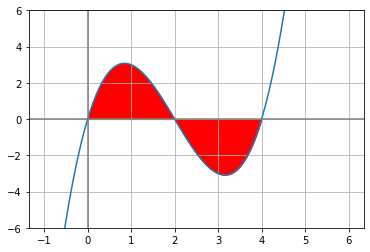

In [24]:
# Mostramos la función
def fun(x):
  return x**3 - 6*x**2 + 8*x

x = np.linspace(-1, 6, 100)
y = fun(x)
plt.plot(x, y)
plt.grid(True, which='both')
plt.axhline(y=0, color='grey')
plt.axvline(x=0, color='grey')
x_area1 = np.linspace(0, 2, 50)
x_area2 = np.linspace(2, 4, 50)
plt.fill_between(x_area1, fun(x_area1), color='red')
plt.fill_between(x_area2, fun(x_area2), color='red')
plt.ylim(-6,6);

In [28]:
# Creamos el polinomio

from scipy import poly1d

p = poly1d([1,-6,8,0])
print(p)


   3     2
1 x - 6 x + 8 x


Resultado esperado:

```
   3     2
1 x - 6 x + 8 x
```

In [29]:
# Calculamos sus raíces
p.r

array([4., 2., 0.])

Resultado esperado:
```
array([4., 2., 0.])
```

In [68]:
# Calculamos integral entre los intervalos
from scipy.integrate import quad
import math as math

float(math.floor(np.sum(quad(fun, 0,2))) + math.floor(np.sum(quad(fun,4,2))))

8.0

Resultado esperado:
```
8.0
```

2. Comprime la imagen siguiente usando descomposición de valores singulares (SVD).

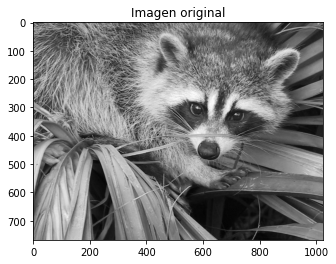

(768, 1024)

In [80]:
from scipy import signal, misc

image = misc.face(gray=True).astype(np.float32)
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Imagen original')
plt.show()
image.shape

In [114]:
from scipy import linalg
from numpy import zeros
from numpy import diag



def compress(img, n_sv=100):
  """
  Esta función calcula la descomposición SVD de la imagen y se queda con los n_sv 
  valores singulares indicados, generado una versión comprimida
  """
  # Descomponemos la imagen usando SVD
  U, s, VT = linalg.svd(img)

  # create m x n Sigma matrix
  Sigma = zeros((img.shape[0], img.shape[1]))
  Sigma[:img.shape[0], :img.shape[0]] = diag(s)
  Sigma = Sigma[:, :n_sv]
  VT = VT[:n_sv, :]

  # Recomponemos recortando la dimensionalidad

  return U.dot(Sigma.dot(VT))
  

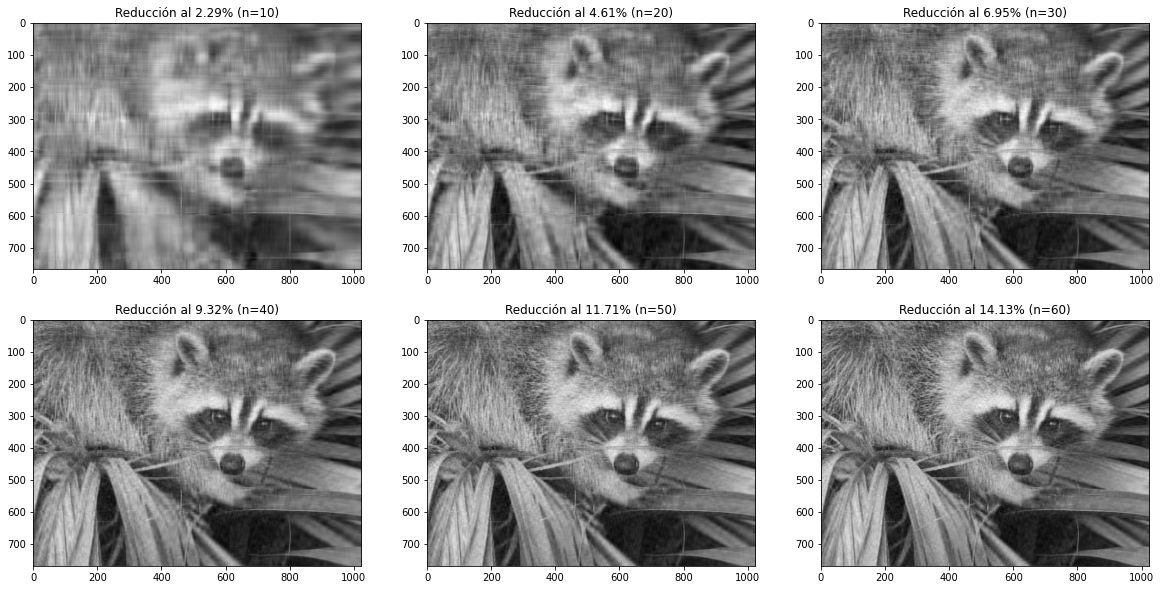

In [116]:
# Mostramos el aspecto de distintas compresiones

plt.figure(figsize=(20,10))
for i in range(1,7):
  plt.subplot(2,3,i)
  n = i*10
  h,w = image.shape
  ratio = (h*n + n*n + n*w) / (h*w) * 100
  plt.imshow(compress(image, n))
  plt.title('Reducción al %.2f%% (n=%d)' % (ratio, n))

Resultado esperado:

![](https://drive.google.com/uc?id=1mrS4_JdW7P2IpmesK9VhlbVRYUcX_XZq)

# Referencias

Os animo a que exploréis todas las posibilidades de esta potente herramienta científica.


- [SciPy tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)

![](https://lh3.googleusercontent.com/proxy/n2pkW0Eboeqv-OwJhXphRQrq_J-WrCW6hUtTEmEXpkiDsicejB9BqZ_bsthVzbXLxXPYBvFBjz6lX2oMcn8lCjWWWJ7HM0a-mtmJ3mRZglf_2lmJdAUS10H19nw)

¡Ya estamos a mitad del parto! ¡Ánimo que os ayudo con Python como herramienta a mano!